In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [66]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting Dataset

In [67]:
#Checking number of rows & columns
df.shape

(1460, 81)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [69]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [70]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Data Cleansing

#### Checking for null

In [71]:
null_perc = round(df.isnull().sum()/len(df.index),2)
null_perc

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.18
LotArea          0.00
Street           0.00
Alley            0.94
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.01
MasVnrArea       0.01
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.03
BsmtCond         0.03
BsmtExposure     0.03
BsmtFinType1     0.03
BsmtFinSF1       0.00
BsmtFinType2     0.03
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [72]:
null_perc.sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageYrBlt      0.06
GarageFinish     0.06
GarageType       0.06
GarageQual       0.06
GarageCond       0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
LowQualFinSF     0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC 

##### Dropping value which have more than 10% of null values

In [73]:
null_perc[null_perc.values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [74]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [75]:
#Treating NaN values
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['GarageYrBlt'].fillna('Other')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [77]:
# Imputing the Nan Values

for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No_Garage')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### EDA

#### Univariate & Bivariate Analysis

Text(0.5, 1.0, 'Basement Condition')

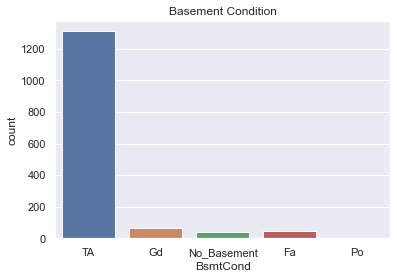

In [79]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= df)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Zone Classification')

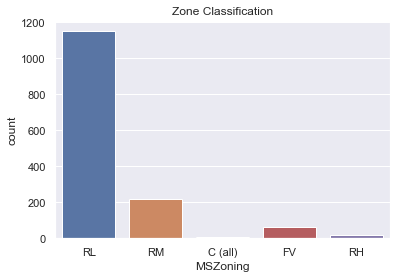

In [80]:
## Checking Zone
sns.countplot(x='MSZoning', data= df)
plt.title('Zone Classification')

Text(0.5, 1.0, 'Area Shape')

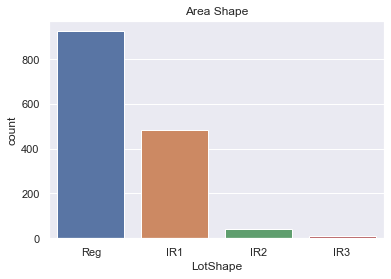

In [81]:
## Checking Shape
sns.countplot(x='LotShape', data= df)
plt.title('Area Shape')

Text(0.5, 1.0, 'Overall Condition')

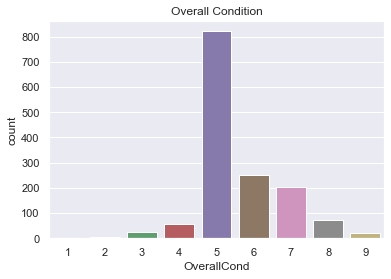

In [82]:
sns.countplot(x='OverallCond', data= df)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

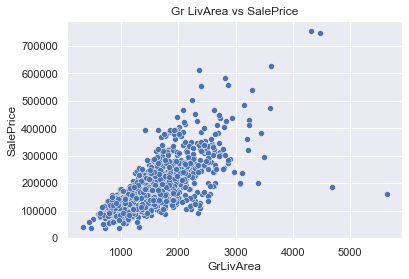

In [83]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

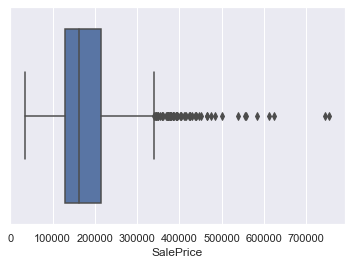

In [84]:
# Checking the outliers 
sns.boxplot(x='SalePrice', data=df)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

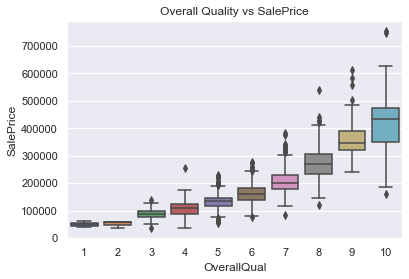

In [85]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")

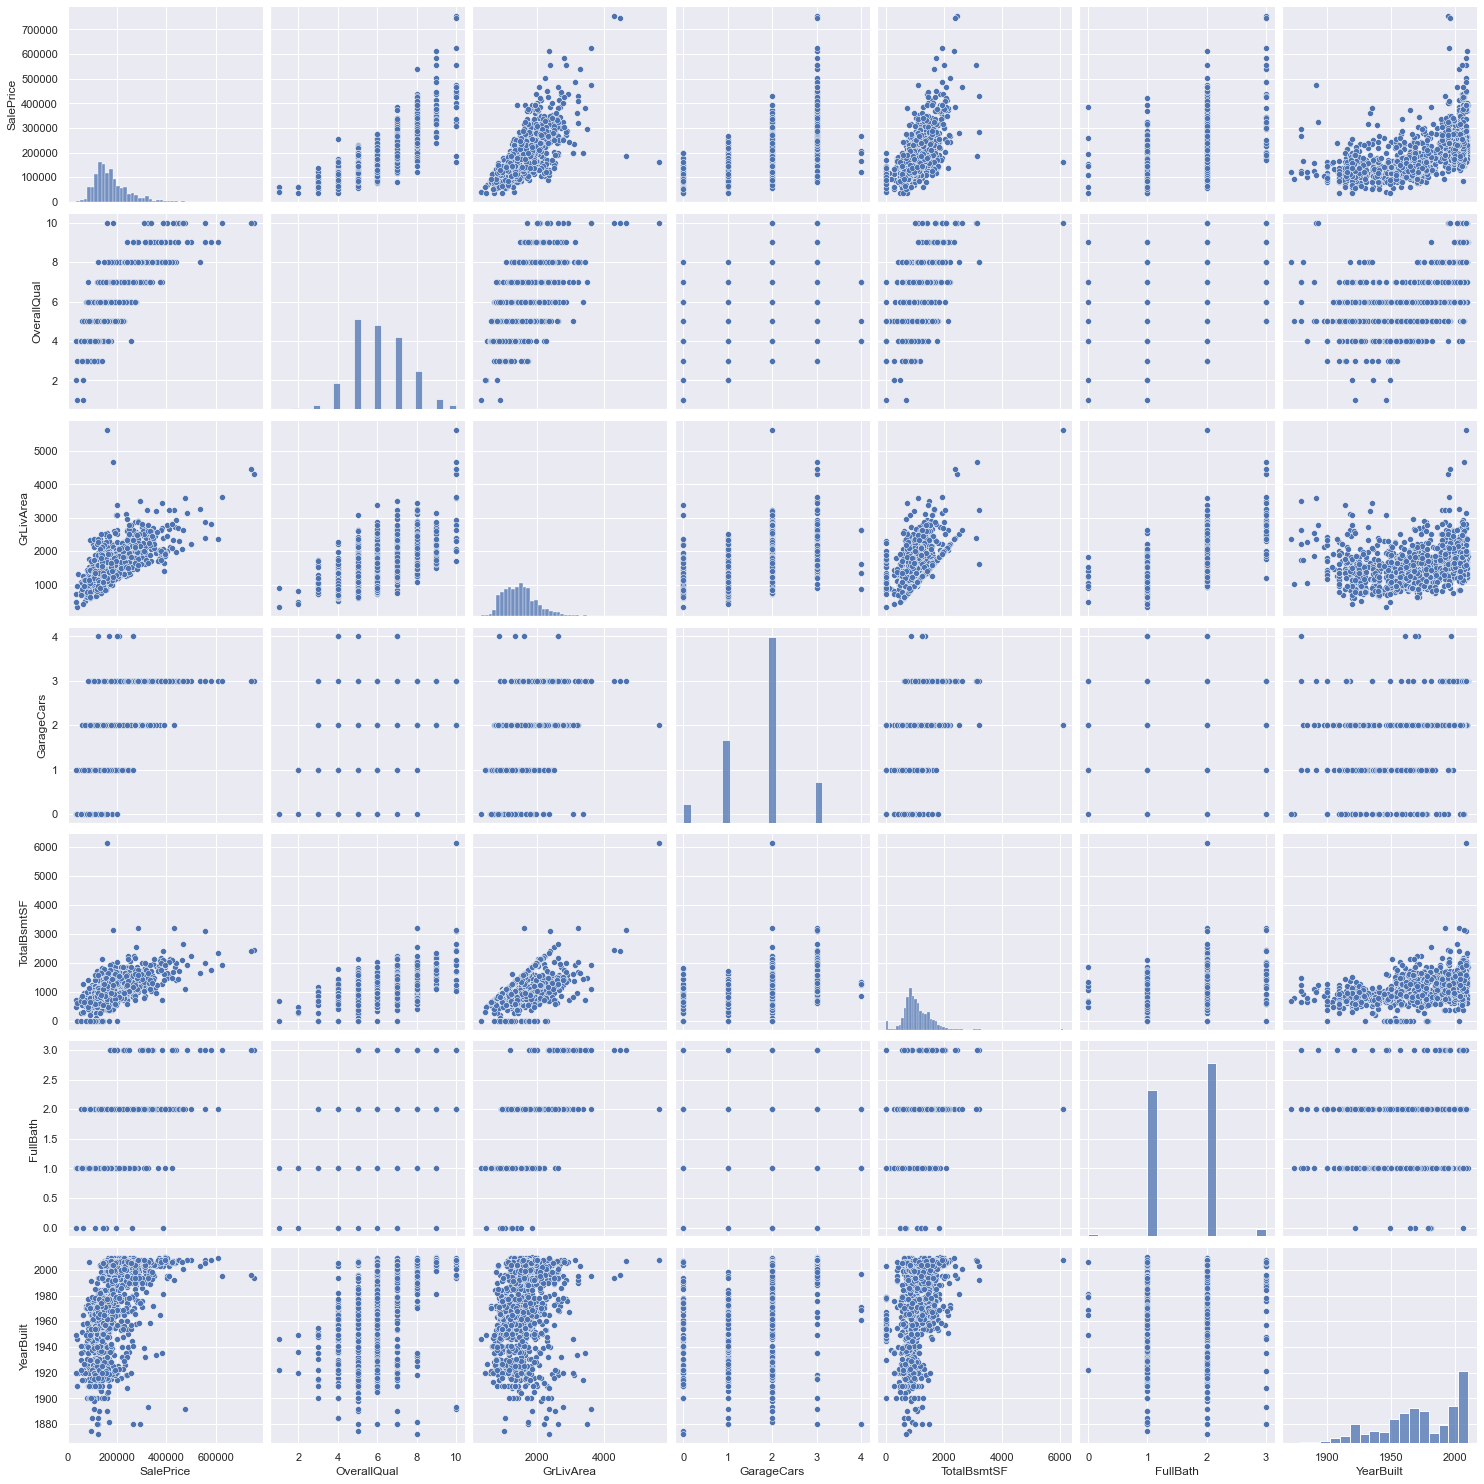

In [86]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols],size=3)
plt.show()


Text(0.5, 1.0, 'Correlation matrix ')

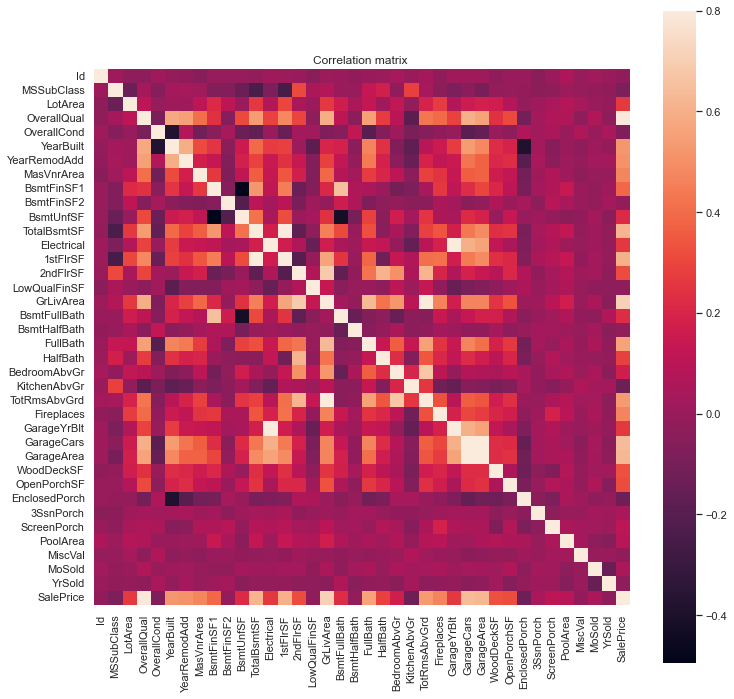

In [87]:
#checking the correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Correlation matrix ")

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

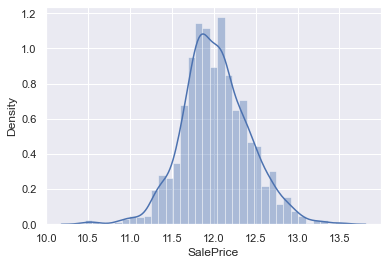

In [88]:
sns.distplot(np.log(df["SalePrice"]))

### Deriving Variables

In [89]:
num_data = df.select_dtypes(include = ['float64','int64'])
print(num_data.columns)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [90]:
# mapping values to 0 and 1
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [91]:
categ_var = df.select_dtypes(include=['object'])
categ_var.head(8)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
5,RL,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,TA,Typ,Attchd,Unf,TA,TA,WD,Normal
6,RL,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
7,RL,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,TA,Typ,Attchd,RFn,TA,TA,WD,Normal


In [92]:
categ_var.shape

(1460, 34)

###### Creating dummy varaibles

In [93]:
df_dummies = pd.get_dummies(categ_var, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0

In [94]:
# Droping categorical column & appending 
df = df.drop(list(categ_var.columns), axis=1)
df = pd.concat([df,df_dummies], axis=1)

In [95]:
df.shape

(1460, 238)

## Data Splitting

In [96]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [97]:
# Training Data
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice", axis=1)
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)
#Testing Data
y_test = np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)
print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

X_train =  (1021, 237)
y_train =  (1021,)
X_test =  (438, 237)
y_test =  (438,)


In [98]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [99]:
#Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Model Building

In [100]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
rfe = RFE(lr,20)
rfe = rfe.fit(X_train,y_train)
col=X_train.columns[rfe.support_]
col

Index(['Electrical', 'GarageYrBlt', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Functional_Sev', 'GarageType_No_Garage',
       'GarageFinish_No_Garage', 'GarageQual_No_Garage',
       'GarageCond_No_Garage'],
      dtype='object')

### 1. Ridge Regression

In [102]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9577358810944735
0.8659665045027514


###### We can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [103]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

#Creating ridge 
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-0.09090280223742689


In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009117,0.003342,0.001395,0.001196,0.0001,{'alpha': 0.0001},-0.090204,-0.093690,-0.093939,-0.095949,-0.083042,-0.091365,0.004553,3,-0.055330,-0.056193,-0.056562,-0.057935,-0.056338,-0.056472,0.000842
1,0.010456,0.002693,0.003614,0.001029,0.001,{'alpha': 0.001},-0.090081,-0.093665,-0.093958,-0.095558,-0.082951,-0.091243,0.004516,2,-0.055389,-0.056200,-0.056608,-0.057977,-0.056384,-0.056512,0.000840
2,0.006992,0.003732,0.004720,0.005560,0.01,{'alpha': 0.01},-0.090072,-0.093441,-0.094806,-0.092664,-0.083530,-0.090903,0.003996,1,-0.056510,-0.056267,-0.057358,-0.058663,-0.057248,-0.057209,0.000838
3,0.003123,0.006245,0.003124,0.006248,0.05,{'alpha': 0.05},-0.093895,-0.092800,-0.098232,-0.087511,-0.087796,-0.092047,0.004022,12,-0.060568,-0.056618,-0.060441,-0.062019,-0.061125,-0.060154,0.001854
4,0.012714,0.006371,0.003329,0.006162,0.1,{'alpha': 0.1},-0.095857,-0.092497,-0.100139,-0.085932,-0.090657,-0.093017,0.004792,17,-0.063127,-0.057020,-0.062712,-0.064774,-0.063979,-0.062322,0.002745
5,0.003125,0.006250,0.003124,0.006249,0.2,{'alpha': 0.2},-0.097419,-0.092477,-0.101527,-0.084546,-0.092906,-0.093775,0.005674,22,-0.065574,-0.057676,-0.064711,-0.067660,-0.066706,-0.064465,0.003539
6,0.013030,0.002568,0.006026,0.006758,0.3,{'alpha': 0.3},-0.098065,-0.092582,-0.102190,-0.083589,-0.093482,-0.093982,0.006233,26,-0.066873,-0.058205,-0.065731,-0.069235,-0.068126,-0.065634,0.003897
7,0.011575,0.005197,0.000598,0.001195,0.4,{'alpha': 0.4},-0.098304,-0.092643,-0.102572,-0.082720,-0.093526,-0.093953,0.006653,25,-0.067767,-0.058694,-0.066361,-0.070253,-0.069118,-0.066438,0.004086
8,0.012497,0.006249,0.003124,0.006248,0.5,{'alpha': 0.5},-0.098318,-0.092805,-0.102787,-0.082105,-0.093358,-0.093875,0.006915,24,-0.068442,-0.059140,-0.066816,-0.070992,-0.069867,-0.067051,0.004196
9,0.003124,0.006249,0.000000,0.000000,0.6,{'alpha': 0.6},-0.098220,-0.092910,-0.102907,-0.081888,-0.093216,-0.093828,0.007007,23,-0.068998,-0.059530,-0.067172,-0.071582,-0.070452,-0.067547,0.004272


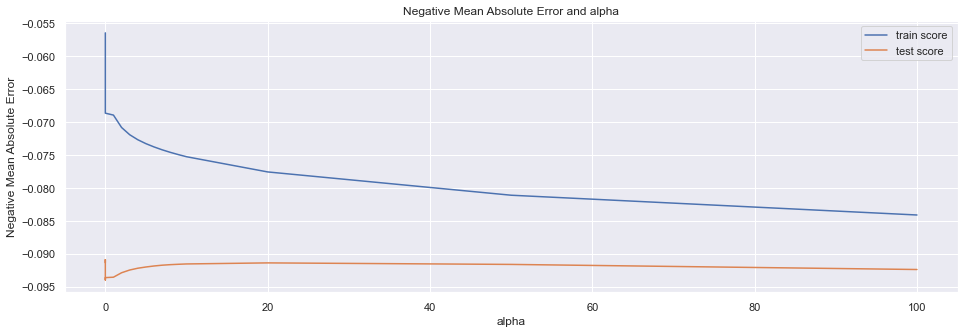

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [107]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-0.09090280223742689


In [108]:
#final ridge model
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.19542307e-03 -1.46481022e-02  3.06297851e-02  5.01359932e-03
  5.56157671e-02  3.79444616e-02  5.80579619e-02  2.23717455e-02
  5.85842407e-04  2.87498579e-02  9.44162763e-03  8.71561165e-03
  4.11430630e-02  1.16127484e-02 -2.92023556e-02  4.64686106e-02
  4.84995573e-02  3.74680173e-04  7.44803303e-02  1.43751485e-02
  1.03235115e-03  5.48449398e-03  3.14613475e-03  7.87982210e-03
 -1.38784554e-02  4.07157320e-03  1.06337776e-02 -2.92023556e-02
  1.76638780e-02  2.07156282e-02  4.20711414e-03  1.03165155e-02
  3.96597068e-03  6.83854810e-03  5.24610315e-03  8.63928453e-03
 -5.72455885e-04  5.88216144e-04  6.37614971e-04 -4.64812630e-03
  4.39713357e-01  4.39828394e-01  4.35518874e-01  3.84883647e-01
  1.35028036e-02 -2.19076035e-02  5.89062801e-03  1.26016521e-02
  5.18752122e-03  2.43896557e-02 -8.64236126e-02  3.05028986e-02
 -3.90744843e-02 -3.03684291e-02 -7.13340538e-03  2.35001798e-02
 -1.95407842e-01  5.44878062e-02 -3.69640835e-02  7.24871502e-02
  6.30572177e-02  1.28136

In [109]:
#R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9571736694995763


In [110]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8701775207151339


In [111]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.021361005869487054

### 2. Lasso Regression

In [112]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [114]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0874962667167627


In [115]:
#final lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [116]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9058356460943556


In [117]:
#Predict the R-squared value for test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.883965104143579


In [118]:
print("MSE = ",mean_squared_error(y_test, y_test_pred))

MSE =  0.019092395285531027


In [119]:
print("Coef = ",lasso.coef_)

Coef =  [-0.00300436 -0.01752284  0.01658546  0.0071816   0.09203473  0.04293998
  0.04873123  0.02201058 -0.         -0.          0.00249957  0.00585532
  0.01158962  0.01385995 -0.          0.00133013  0.         -0.00139554
  0.11158736  0.03430636  0.00386902  0.01721497  0.01024966  0.00750661
 -0.01112916  0.01415829  0.0187093  -0.          0.04700605  0.
  0.00182808  0.01393265 -0.0002287   0.00723881  0.00573422  0.01143462
 -0.01988585 -0.00102675 -0.00091431 -0.00736438  0.          0.
  0.05175633 -0.00248293  0.         -0.01254494  0.          0.
  0.          0.00498064 -0.          0.03311623 -0.         -0.
 -0.          0.00372689  0.         -0.         -0.          0.00434741
  0.03809041 -0.          0.10917021 -0.06242547 -0.         -0.03433354
 -0.         -0.         -0.         -0.         -0.          0.03592501
  0.09160141 -0.          0.         -0.00080967 -0.          0.10346676
  0.02438646 -0.          0.         -0.          0.05769262  0.
 -0.      

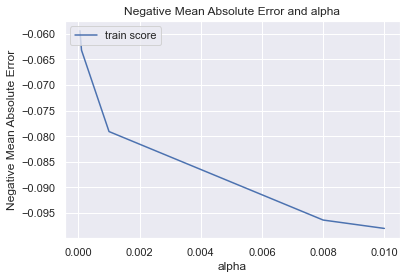

In [120]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [121]:
model_cv.best_params_

{'alpha': 0.01}

## Final Models

In [122]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9571736694995763
0.8701775207151339


In [123]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,Id,8.956038
114,RoofMatl_Membran,2.682719
115,RoofMatl_Metal,2.526634
116,RoofMatl_Roll,2.492464
119,RoofMatl_WdShngl,2.456997
117,RoofMatl_Tar&Grv,2.433434
113,RoofMatl_CompShg,2.417586
118,RoofMatl_WdShake,2.294150
42,MSZoning_RH,0.439828
41,MSZoning_FV,0.439713


In [124]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9058356460943556
0.883965104143579


Best alpha value for Lasso : {'alpha': 0.001}
Best alpha value for Ridge : {'alpha': 0.01}

After compairing both the model we can see that the below Features are best explaining the DataSet

    1. MSSubClass
    2. RoofMatl_Membran
    3. MSZoning_RL
    4. MSZoning_FV
    5. MSZoning_RH
    6. MSZoning_RM
    7. Condition2_PosA
    8. RoofMatl_WdShngl